# 4 Resampling time series


In [2]:
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
!wget -q "https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv"

Czasami nasze obserwacje nie mają odpowiedniej częstotliwości, obserwacje mogą mieć wyższą lub niższą częstotliwość niż nasza pożądana częstotliwość prognozowana. Na przykład firma potrzebuje dziennej prognozy, ale ma obserwacje godzinowe lub miesięczne. W takim scenariuszu zastosowanie dwóch technik może pomóc nam w skorygowaniu częstotliwości zgodnie z celami biznesowymi.

**Upsampling**


Jest to proces zwiększania częstotliwości pobierania próbek, na przykład co tydzień do dnia. W poniższym przykładzie będziemy interpolować dane z miesiąca na dzień. Obiekt Series Pandas udostępnia funkcję interpolate () z ładnym wyborem prostych i bardziej złożonych metod. Tutaj używamy metody liniowej.

Dane zawierają tylko pierwszy dzień danego miesiąca

In [49]:
# do utworzneia df (nie zwiaznae próbkowaniem)
def parser(x):
  return pd.datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv('shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64

In [65]:
series["1901-01"]

Month
1901-01-01    266.0
Name: Sales, dtype: float64

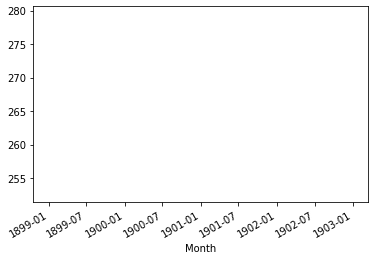

In [64]:
series["1901-01"].plot()

In [57]:
len(series)

36

In [ ]:
series

In [51]:
upsampled = series.resample('D').mean()

In [52]:
interpolated = upsampled.interpolate(method='linear')
interpolated.head(50)

Month
1901-01-01    266.000000
1901-01-02    262.125806
1901-01-03    258.251613
1901-01-04    254.377419
1901-01-05    250.503226
1901-01-06    246.629032
1901-01-07    242.754839
1901-01-08    238.880645
1901-01-09    235.006452
1901-01-10    231.132258
1901-01-11    227.258065
1901-01-12    223.383871
1901-01-13    219.509677
1901-01-14    215.635484
1901-01-15    211.761290
1901-01-16    207.887097
1901-01-17    204.012903
1901-01-18    200.138710
1901-01-19    196.264516
1901-01-20    192.390323
1901-01-21    188.516129
1901-01-22    184.641935
1901-01-23    180.767742
1901-01-24    176.893548
1901-01-25    173.019355
1901-01-26    169.145161
1901-01-27    165.270968
1901-01-28    161.396774
1901-01-29    157.522581
1901-01-30    153.648387
1901-01-31    149.774194
1901-02-01    145.900000
1901-02-02    147.228571
1901-02-03    148.557143
1901-02-04    149.885714
1901-02-05    151.214286
1901-02-06    152.542857
1901-02-07    153.871429
1901-02-08    155.200000
1901-02-09    156.5

In [58]:
len(interpolated)

1065

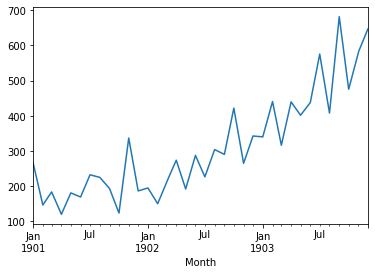

In [59]:
#Plot linearly interpolated data
interpolated.plot()

In [66]:
interpolated["1901-01"]

Month
1901-01-01    266.000000
1901-01-02    262.125806
1901-01-03    258.251613
1901-01-04    254.377419
1901-01-05    250.503226
1901-01-06    246.629032
1901-01-07    242.754839
1901-01-08    238.880645
1901-01-09    235.006452
1901-01-10    231.132258
1901-01-11    227.258065
1901-01-12    223.383871
1901-01-13    219.509677
1901-01-14    215.635484
1901-01-15    211.761290
1901-01-16    207.887097
1901-01-17    204.012903
1901-01-18    200.138710
1901-01-19    196.264516
1901-01-20    192.390323
1901-01-21    188.516129
1901-01-22    184.641935
1901-01-23    180.767742
1901-01-24    176.893548
1901-01-25    173.019355
1901-01-26    169.145161
1901-01-27    165.270968
1901-01-28    161.396774
1901-01-29    157.522581
1901-01-30    153.648387
1901-01-31    149.774194
Freq: D, Name: Sales, dtype: float64

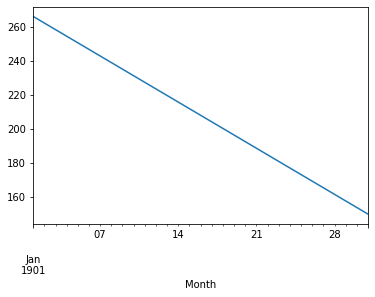

In [67]:
interpolated["1901-01"].plot()

Możemy wypróbować inną popularną metodę interpolacji, tj. Wielomian lub splajn, aby połączyć wartości. Musimy określić liczbę wyrazów w wielomianu.

In [68]:
# do utworzneia df (nie zwiaznae próbkowaniem)
def parser(x):
  return pd.datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv('shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64

In [71]:
upsampled = series.resample('D').mean()
interpolated = upsampled.interpolate(method='spline', order=2)

In [72]:
interpolated.head(31)

Month
1901-01-01    266.000000
1901-01-02    258.630160
1901-01-03    251.560886
1901-01-04    244.720748
1901-01-05    238.109746
1901-01-06    231.727880
1901-01-07    225.575149
1901-01-08    219.651553
1901-01-09    213.957094
1901-01-10    208.491770
1901-01-11    203.255582
1901-01-12    198.248529
1901-01-13    193.470612
1901-01-14    188.921831
1901-01-15    184.602185
1901-01-16    180.511676
1901-01-17    176.650301
1901-01-18    173.018063
1901-01-19    169.614960
1901-01-20    166.440993
1901-01-21    163.496161
1901-01-22    160.780465
1901-01-23    158.293905
1901-01-24    156.036481
1901-01-25    154.008192
1901-01-26    152.209039
1901-01-27    150.639021
1901-01-28    149.298139
1901-01-29    148.186393
1901-01-30    147.303783
1901-01-31    146.650308
Freq: D, Name: Sales, dtype: float64

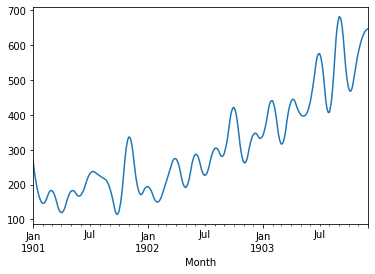

In [73]:
interpolated.plot()

Downsampling

Zmniejsz częstotliwość próbek, na przykład codziennie lub co tydzień. Dane o sprzedaży są miesięczne, ale biznes potrzebuje prognoz kwartalnych. Przeprowadźmy ponowne próbkowanie danych zgodnie z potrzebami biznesowymi

In [75]:
# do utworzneia df (nie zwiaznae próbkowaniem)
def parser(x):
  return pd.datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv('shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series[:3]

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
Name: Sales, dtype: float64

In [76]:
resample = series.resample('Q')
quarterly_mean_sales = resample.mean()

In [77]:
quarterly_mean_sales.head()

Month
1901-03-31    198.333333
1901-06-30    156.033333
1901-09-30    216.366667
1901-12-31    215.100000
1902-03-31    184.633333
Freq: Q-DEC, Name: Sales, dtype: float64

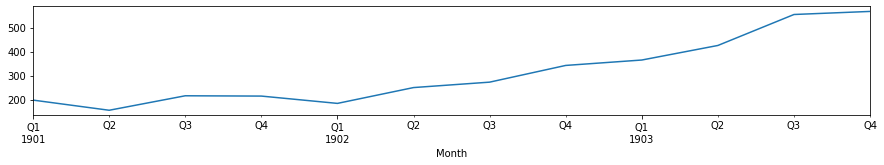

In [79]:
quarterly_mean_sales.plot(figsize=(15,2))